##### Imports

In [1]:
import numpy as np
import pandas as pd
import pickle

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
figure(figsize=(10, 8))

import warnings
warnings.filterwarnings("ignore")

<Figure size 1000x800 with 0 Axes>

In [2]:
# config
root = "./data/"
allcols = ["Year", "Commodity Code", "Commodity", "Trade Value (US$)"]
cols = ["Year", "Commodity Code", "Trade Value (US$)"]

yr0 = 2000
yri = 2008
yrt = 2021

epsilon = 0.01

def sep(val):
    print("-"*val)

In [24]:
# temp functions

# country_list = pd.concat([pd.read_excel(root + "list.xlsx", sheet_name="Sheet1"), pd.read_excel(root + "list.xlsx", sheet_name="Sheet2")])
# country_list.reset_index(drop=True, inplace=True)
# country_list.shape

# from openpyxl import load_workbook

# # get sheet names
# wb1 = load_workbook(root + "A-M Master File(00-28).xlsx")
# wb2 = load_workbook(root + "N-Z Master File(00-28).xlsx")
# a_m = wb1.sheetnames
# n_z = wb2.sheetnames
# country_names = a_m + n_z

# print(f"{len(a_m)} + {len(n_z)} = {len(country_names)}")


# with open("./files/country_names_a_m.pkl", "wb") as f:
#     pickle.dump(a_m, f)

# with open("./files/country_names_n_z.pkl", "wb") as f:
#     pickle.dump(n_z, f)

# with open("./files/country_names_a_z.pkl", "wb") as f:
#     pickle.dump(country_names, f)

# def get_commodity(df_a_z):
#     commodity = dict()

#     for country, df in df_a_z.items():
#         for idx, row in df[["Commodity Code", "Commodity"]].iterrows():
#             code, name = row
#             if commodity.get(code) == None:
#                 commodity[code] = name

#     return commodity

# commodity = get_commodity(df_a_z)
# print(commodity)

In [3]:
with open("./lists/country_names_a_m.pkl", "rb") as f:
    a_m = pickle.load(f)

with open("./lists/country_names_n_z.pkl", "rb") as f:
    n_z = pickle.load(f)

with open("./lists/country_names_a_z.pkl", "rb") as f:
    country_names = pickle.load(f)

with open("./lists/commodities.pkl", "rb") as f:
    commodities = pickle.load(f)

In [48]:
df_a_m = pd.read_excel(root + "A-M Master File(00-28).xlsx", sheet_name=a_m)
df_n_z = pd.read_excel(root + "N-Z Master File(00-28).xlsx", sheet_name=n_z)

df_a_z = dict(df_a_m)
df_a_z.update(df_n_z)

del df_a_m, df_n_z

print(len(df_a_z))

# shorten df_a_z
for country, df in df_a_z.items():
    df_a_z[country] = df[allcols]

180


In [6]:
commodities

{2: 'DAIRY PRODUCTS,BIRD EGGS',
 5: 'VEGETABLES AND FRUIT',
 7: 'COFFEE,TEA,COCOA,SPICES',
 8: 'ANIMAL FEED STUFF',
 22: 'OIL SEED,OLEAGINUS FRUIT',
 27: 'CRUDE FERTILIZER,MINERAL',
 4: 'CEREALS,CEREAL PREPRTNS.',
 11: 'BEVERAGES',
 28: 'METALLIFEROUS ORE,SCRAP',
 0: 'LIVE ANIMALS',
 6: 'SUGAR,SUGR.PREPTNS,HONEY',
 1: 'MEAT, MEAT PREPARATIONS',
 12: 'TOBACCO,TOBACCO MANUFACT',
 21: 'HIDES,SKINS,FURSKINS,RAW',
 26: 'TEXTILE FIBRES',
 24: 'CORK AND WOOD',
 3: 'FISH,CRUSTACEANS,MOLLUSC',
 9: 'MISC.EDIBLE PRODUCTS ETC',
 23: 'CRUDE RUBBER',
 25: 'PULP AND WASTE PAPER'}

In [6]:
# mini, maxi = 2000, 2000
# for country, df in df_a_z.items():
#     yr = df.Year.unique()
#     a, b = yr[0], yr[-1]

#     mini = min(mini, a)
#     maxi = max(maxi, b)
# print(mini, maxi)

Significant data found in 2000-2021 <br>
2000-2021: 22 years <br>
Split: 2000 to 2008 and 2009 to 2021 <br>


In [7]:
""""
dfs = {
    commodity_code: df
}
"""

'"\ndfs = {\n    commodity_code: df\n}\n'

filling NA values @ T (for particular country) with 0

In [7]:
def get_dfs(df_a_z, commodities, yr0, yrt):
    dfs = dict()
    t = np.arange(yr0, yrt + 1)

    for code, _ in commodities.items():
        dfs[code] = pd.DataFrame([], columns=t)


    for country, df in df_a_z.items():
        for idx, row in df.iterrows():
            yr, code, c, val = row
            if yr in t:
                dfs[code].loc[country, yr] = val

    for k, df in dfs.items():
        dfs[k].fillna(0, inplace=True)

    return dfs

dfs_t = get_dfs(df_a_z, commodities, yr0, yrt)

In [8]:
# filling missing values

for df in dfs_t.values():
    for c, row in df.iterrows():
        arr = row.values

        for idx in np.where(arr == 0)[0]:
            if(idx == 0 or idx == arr.size-1):
                continue
            if(arr[idx-1] == 0 or arr[idx+1] == 0):
                continue
            else:
                arr[idx] = (arr[idx-1] + arr[idx+1]) / 2

        df.loc[c] = arr

In [10]:
for k, df in dfs_t.items():
    print(k, df.shape[0], sep="\t")

2	173
5	176
7	95
8	171
22	172
27	174
4	174
11	174
28	175
0	171
6	174
1	173
12	172
21	161
26	173
24	173
3	175
9	175
23	160
25	160


In [11]:
# with pd.ExcelWriter("./data/commodity_wise_data.xlsx") as writer:
#     for code, df in dfs.items():
#         df.to_excel(writer, sheet_name=commodities[code])

In [12]:
# print info of each df
for k in dfs_t.keys():
    print(dfs_t[k].info())
    sep(50)

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to ASEAN
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2000    173 non-null    int64
 1   2001    173 non-null    int64
 2   2002    173 non-null    int64
 3   2003    173 non-null    int64
 4   2004    173 non-null    int64
 5   2005    173 non-null    int64
 6   2006    173 non-null    int64
 7   2007    173 non-null    int64
 8   2008    173 non-null    int64
 9   2009    173 non-null    int64
 10  2010    173 non-null    int64
 11  2011    173 non-null    int64
 12  2012    173 non-null    int64
 13  2013    173 non-null    int64
 14  2014    173 non-null    int64
 15  2015    173 non-null    int64
 16  2016    173 non-null    int64
 17  2017    173 non-null    int64
 18  2018    173 non-null    int64
 19  2019    173 non-null    int64
 20  2020    173 non-null    int64
 21  2021    173 non-null    int64
dtypes: int64(22)
memory usage: 35.2+ KB
None
--

In [10]:
dfs_t[2]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Afghanistan,0,0,0,0,0,0,0,0,176592,157494,...,0,0,0,120515,200173,59590,57799,55781,0,0
Albania,191976,265527,470798,618993,553144,590927,148193,2417036,3922028,2207123,...,5157600,1164077,1965,1358021,1081040,1145677,359739,129845,591253,0
Algeria,1514,205692,409870,5713102,5679682,5457447,3984677,2014541,2962553,2274893,...,2253969,4862264,4082413,2603922,408134,731736,0,0,0,0
Andorra,138,2924,5711,10769,15828,4847,35557,11561,3852,1721,...,2644,6088,219,29698,15144,9461,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1189393,320612,97049,332761,1606096,698716,150294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,82917000,193876784,89700403,70567731,37252936,87935033,92932951,20009707,34363407,29112313,...,127205873,119393963,99931027,101200506,75246667,66734782,95882164,92154228,98565370,111844190
Yemen,0,6252454,4721309,4895077,7332032,10400861,10477902,15523575,23563016,14395564,...,24162081,29765103,33850269,17994960,0,0,0,1318,0,0
Zambia,4587290,4308452,2532782,1774978,791334,8321510,2006844,11210073,2893987,15490712,...,6784390,3980069,6319639,761139,252180,633454,194653,3557097,13702818,40566830
Zimbabwe,12579820,1644649,14937407,13054672,30216119,9438668,8683430,20801051,3503923,4151168,...,3747760,2137087,960321,761139,252180,633454,194653,3557097,3933558,3703617


In [11]:
dfs_g = pd.read_excel("./data/GDP per capita.xls", sheet_name="data")
dfs_g.index = dfs_g['Country Name'].values
dfs_g.drop(['Country Code', 'Country Name', '2022'], axis=1, inplace=True)
dfs_g.columns = pd.to_numeric(dfs_g.columns)
dfs_g

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Aruba,21023.157513,20913.299497,21377.095185,22050.830932,24104.646177,24975.673257,25833.445623,27665.426465,29011.559245,25739.137251,...,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858
Africa Eastern and Southern,707.015752,628.225242,626.580853,812.973645,985.563259,1120.484333,1226.223569,1369.855328,1428.382728,1411.622460,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
Afghanistan,181.000000,125.000000,183.532775,200.462567,221.657604,255.055120,274.000486,375.078128,387.849174,443.845151,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
Africa Western and Central,520.786584,529.584939,619.773282,697.905291,841.357961,1000.869581,1241.851900,1417.605050,1681.477680,1463.393293,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
Angola,556.884244,527.463202,872.657772,982.805601,1254.695563,1900.724725,2597.962682,3121.350475,4081.715004,3123.697586,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2965.449915,2847.555339,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
"Yemen, Rep.",518.148673,515.139982,543.960981,583.391150,669.103362,785.451113,867.782937,956.230635,1153.536232,1045.805408,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
South Africa,3241.674475,2867.466168,2708.435410,4095.710230,5268.272867,5893.213024,6139.626045,6662.029690,6251.894833,6444.167068,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
Zambia,364.031294,401.736210,399.098624,452.283811,556.047143,720.446505,1065.596417,1133.436158,1393.519491,1150.941746,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


In [13]:
from sklearn.mixture import GaussianMixture

In [14]:
dfs_l = dict()

In [15]:
for code, dfi in dfs_t.items():
    # print(code)
    dfs_l[code] = pd.DataFrame([], columns=dfi.columns)
    for year, Xt in dfi.iteritems():
        Xg = dfs_g[year]

        df = pd.merge(Xt, Xg, left_index=True, right_index=True, how='left')
        df.columns = ['tv', 'gdp']
        missing_indices = df.loc[df['gdp'].isna()].index
        df = df.loc[~df['gdp'].isna()]

        gm = GaussianMixture(n_components=3, random_state=0).fit(df)

        means = gm.means_
        labels = gm.predict(df)
        a = np.prod(means, axis=1)

        ranks = np.empty_like(a)
        ranks[np.argsort(a)] = np.arange(len(a))

        new_labels = ranks[labels]
        index = df.index.values

        df_n = pd.DataFrame(new_labels, index=index, columns=[year])

        for idx in missing_indices:
            df_n.loc[idx] = -1
        
        dfs_l[code][year] = df_n[year]

  0%|          | 0/440 [00:00<?, ?it/s]

In [18]:
dfs_l.keys()

dict_keys([2, 5, 7, 8, 22, 27, 4, 11, 28, 0, 6, 1, 12, 21, 26, 24, 3, 9, 23, 25])

In [21]:
dfs_l[2]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Venezuela,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Viet Nam,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Yemen,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [22]:
dfs_t[2]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Afghanistan,0,0,0,0,0,0,0,0,176592,157494,...,0,0,0,120515,200173,59590,57799,55781,0,0
Albania,191976,265527,470798,618993,553144,590927,148193,2417036,3922028,2207123,...,5157600,1164077,1965,1358021,1081040,1145677,359739,129845,591253,0
Algeria,1514,205692,409870,5713102,5679682,5457447,3984677,2014541,2962553,2274893,...,2253969,4862264,4082413,2603922,408134,731736,0,0,0,0
Andorra,138,2924,5711,10769,15828,4847,35557,11561,3852,1721,...,2644,6088,219,29698,15144,9461,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1189393,320612,97049,332761,1606096,698716,150294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,82917000,193876784,89700403,70567731,37252936,87935033,92932951,20009707,34363407,29112313,...,127205873,119393963,99931027,101200506,75246667,66734782,95882164,92154228,98565370,111844190
Yemen,0,6252454,4721309,4895077,7332032,10400861,10477902,15523575,23563016,14395564,...,24162081,29765103,33850269,17994960,0,0,0,1318,0,0
Zambia,4587290,4308452,2532782,1774978,791334,8321510,2006844,11210073,2893987,15490712,...,6784390,3980069,6319639,761139,252180,633454,194653,3557097,13702818,40566830
Zimbabwe,12579820,1644649,14937407,13054672,30216119,9438668,8683430,20801051,3503923,4151168,...,3747760,2137087,960321,761139,252180,633454,194653,3557097,3933558,3703617


In [83]:
value_counts = {}
for yr in dfs_l[5].columns:
    value_counts[yr] = dfs_l[5][yr].value_counts()

value_counts

{2000:  0.0    94
 -1.0    43
  1.0    30
  2.0     9
 Name: 2000, dtype: int64,
 2001:  0.0    87
 -1.0    42
  1.0    26
  2.0    21
 Name: 2001, dtype: int64,
 2002:  0.0    70
 -1.0    42
  2.0    36
  1.0    28
 Name: 2002, dtype: int64,
 2003:  0.0    92
 -1.0    42
  1.0    40
  2.0     2
 Name: 2003, dtype: int64,
 2004:  0.0    73
 -1.0    42
  2.0    37
  1.0    24
 Name: 2004, dtype: int64,
 2005:  0.0    64
 -1.0    42
  2.0    36
  1.0    34
 Name: 2005, dtype: int64,
 2006:  0.0    60
 -1.0    42
  2.0    37
  1.0    37
 Name: 2006, dtype: int64,
 2007:  0.0    69
 -1.0    42
  2.0    41
  1.0    24
 Name: 2007, dtype: int64,
 2008:  0.0    85
 -1.0    42
  1.0    40
  2.0     9
 Name: 2008, dtype: int64,
 2009:  0.0    84
 -1.0    42
  1.0    40
  2.0    10
 Name: 2009, dtype: int64,
 2010:  0.0    87
  1.0    44
 -1.0    42
  2.0     3
 Name: 2010, dtype: int64,
 2011:  0.0    90
 -1.0    42
  1.0    41
  2.0     3
 Name: 2011, dtype: int64,
 2012:  0.0    77
  1.0    5

In [8]:
dfs_c = dict()

for code, df in dfs.items():
    dfs_c[code] = pd.DataFrame([], columns=["2000-2008", "2009-2021"], index=df.index)


for code, df in dfs.items():
    for country, row in df.iterrows():
        dfs_c[code].loc[country, "2000-2008"] = row.loc[yr0:yri].sum()
        dfs_c[code].loc[country, "2009-2021"] = row.loc[yri+1:yrt].sum()

del dfs

## Ranking plot
plot top 10 producer of each commodity

## Scaling And plotting

In [10]:
# different scalling methods
# scaling with max
def scale_max(dfs):
    for k, df in dfs.items():
        scale = df.max()

        dfs[k] = df / (scale + epsilon)

    return dfs

# percent of total
def scale_percent(dfs):
    for k, df in dfs.items():
        tot = df.sum()

        dfs[k] = df / (tot + epsilon)
    
    return dfs

# minmax=(df-df.min())/(df.max()-df.min())
def scale_min_max(dfs):
    for k, df in dfs.items():
        mini = df.min()
        maxi = df.max()
        dfs[k] = (df - mini) / (maxi - mini + epsilon)

    return dfs

def normalize_df(dfs):
    for k, df in dfs.items():
        mean = df.mean()  
        std = df.std()
        dfs[k] = (df - mean) / (std + epsilon)

    return dfs

In [62]:
def plot_scatter(ax, idx):
    df = dfs_c[idx]
    ax.scatter(df["2000-2008"], df["2009-2021"], marker="x")
    ax.set_title(f"{commodities[idx]} ({len(df)})")

def combine_plot(dfs, title=None):
    nrows, ncols = 4, 4
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 15))

    keys = list(dfs.keys())

    for i in range(nrows):
        for j in range(ncols):
            idx = keys[4*i + j]
            plot_scatter(ax[i, j], idx)

    if title != None:
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.95)
    fig.tight_layout()
    plt.show()

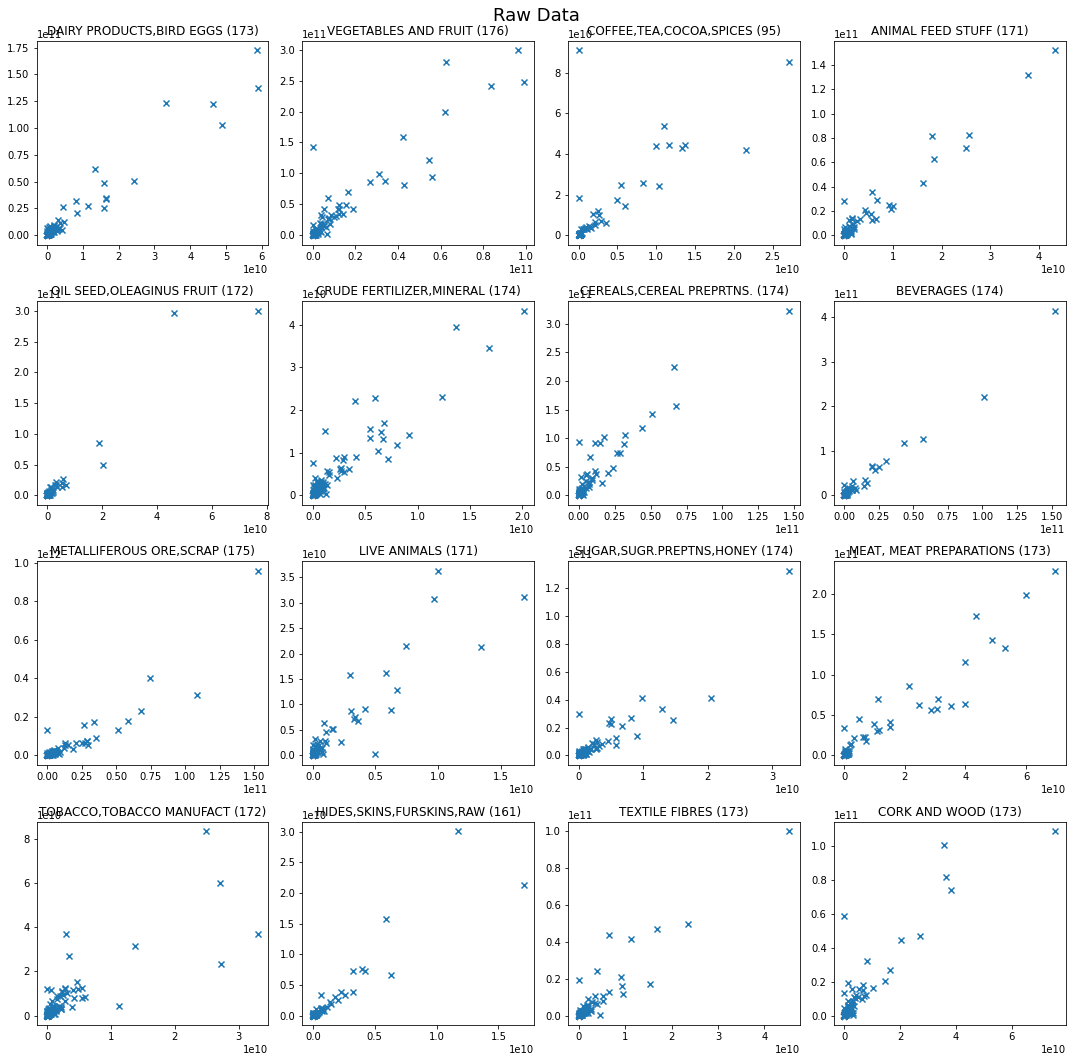

In [63]:
combine_plot(dict(dfs_c), "Raw Data")

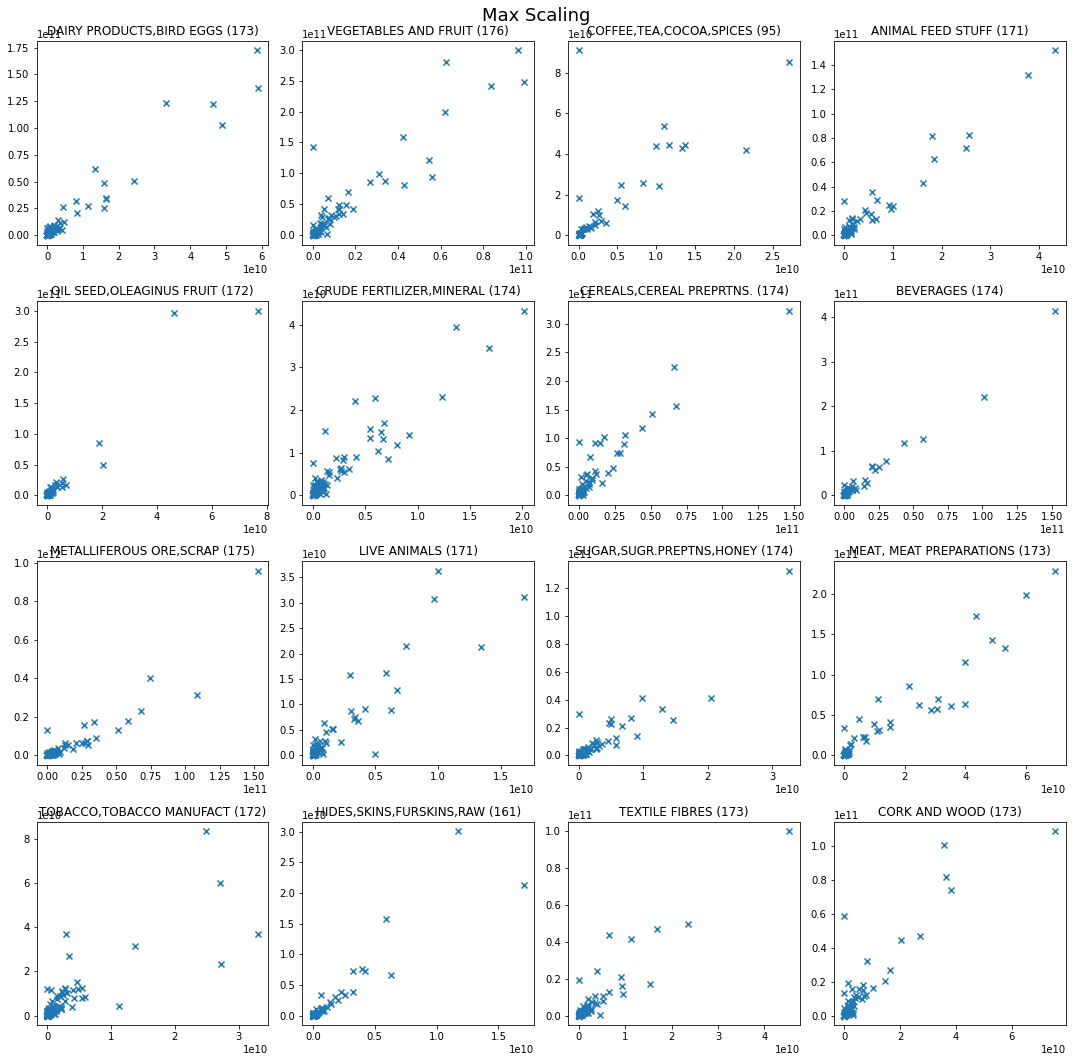

In [64]:
combine_plot(scale_max(dict(dfs_c)), "Max Scaling")

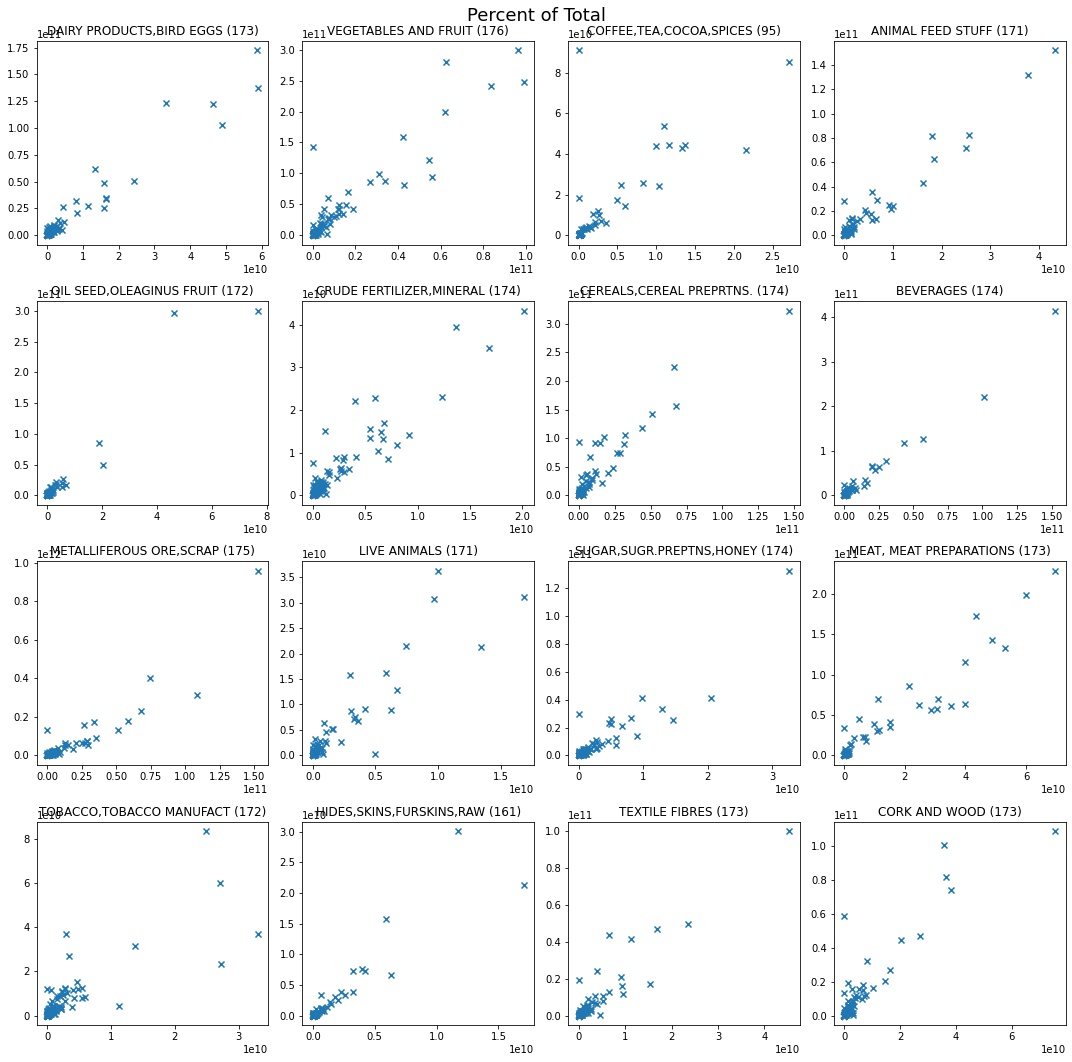

In [65]:
combine_plot(scale_percent(dict(dfs_c)), "Percent of Total")

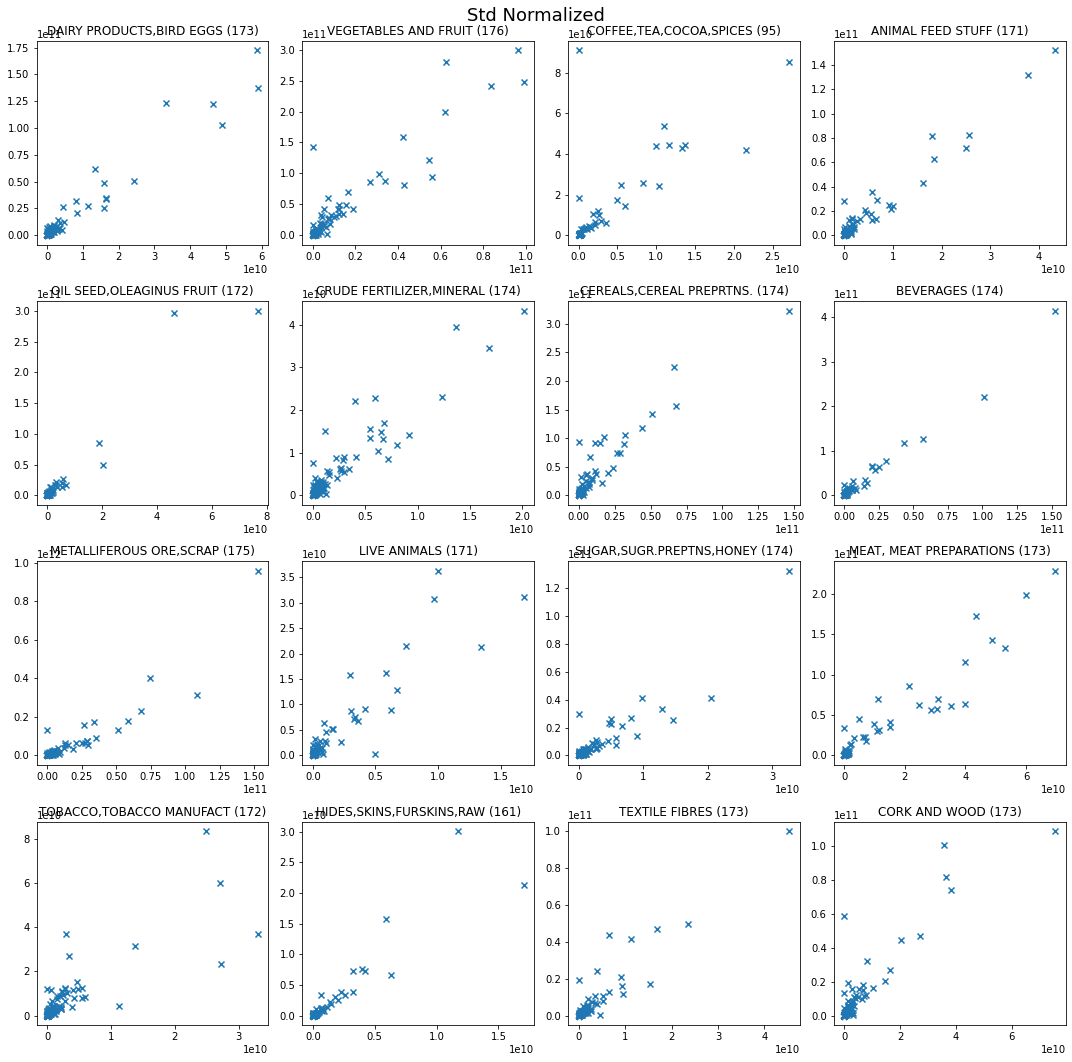

In [66]:
combine_plot(normalize_df(dict(dfs_c)), "Std Normalized")

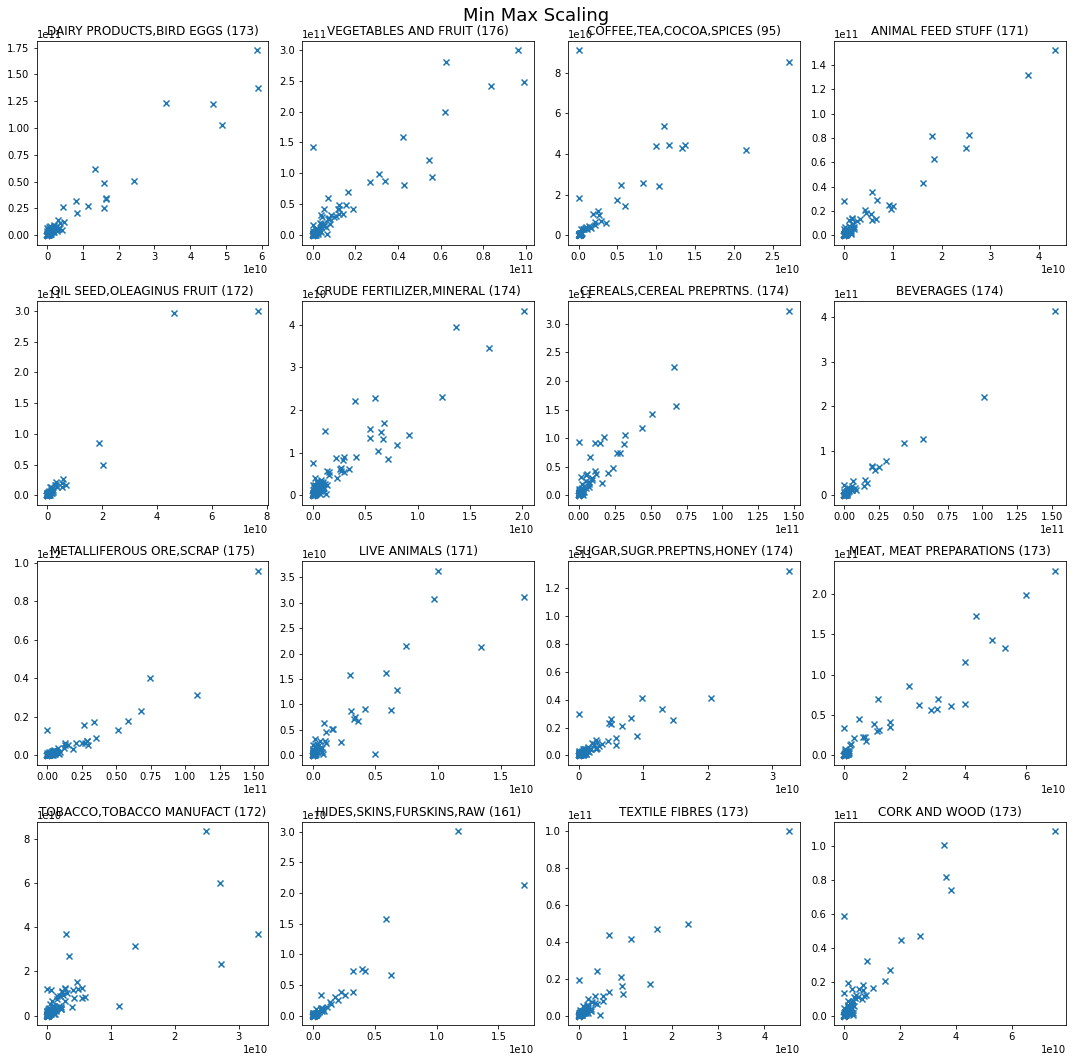

In [67]:
combine_plot(scale_min_max(dict(dfs_c)), "Min Max Scaling")

## Clustering

In [2]:
from sklearn.cluster import KMeans, SpectralClustering

def kmeans_cluster(X, n=2):
    model = KMeans(n)

    model.fit(X)
    yhat = model.predict(X)

    return yhat

def spectral_cluster(X, n=2):
    model = SpectralClustering(n)

    yhat = model.fit_predict(X)

    return yhat

In [14]:
methods = {
    0: kmeans_cluster,
    1: spectral_cluster,
}

In [15]:
def combine_plot_cluster(method=0, dfs_c1=dfs_c):
    clus = methods[method]
    print(f"Using {str(clus).split()[1]}")

    nrows, ncols = 5, 4
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 15))
    plt.tight_layout()

    keys = list(dfs_c1.keys())

    for i in range(nrows):
        for j in range(ncols):
            idx = keys[4*i + j]
            X = dfs_c1[idx].to_numpy()

            yhat = clus(X, 2)
            
            ax[i, j].scatter(X[:,0], X[:,1], c=yhat, marker="x")
            ax[i, j].set_title(f"{commodities[idx]}")
    plt.show()

Using kmeans_cluster


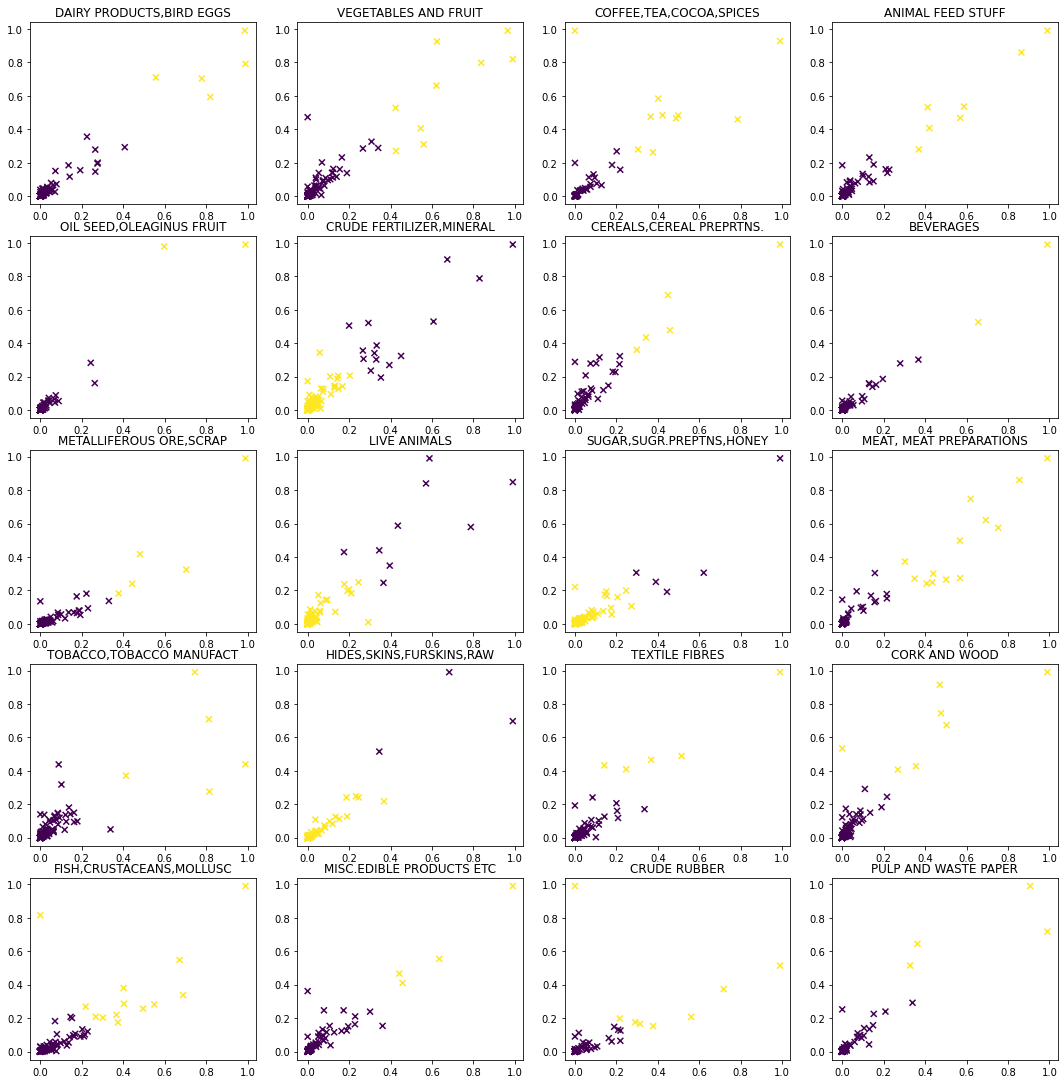

In [20]:
combine_plot_cluster(0, scale_percent(dfs_c))

Using spectral_cluster


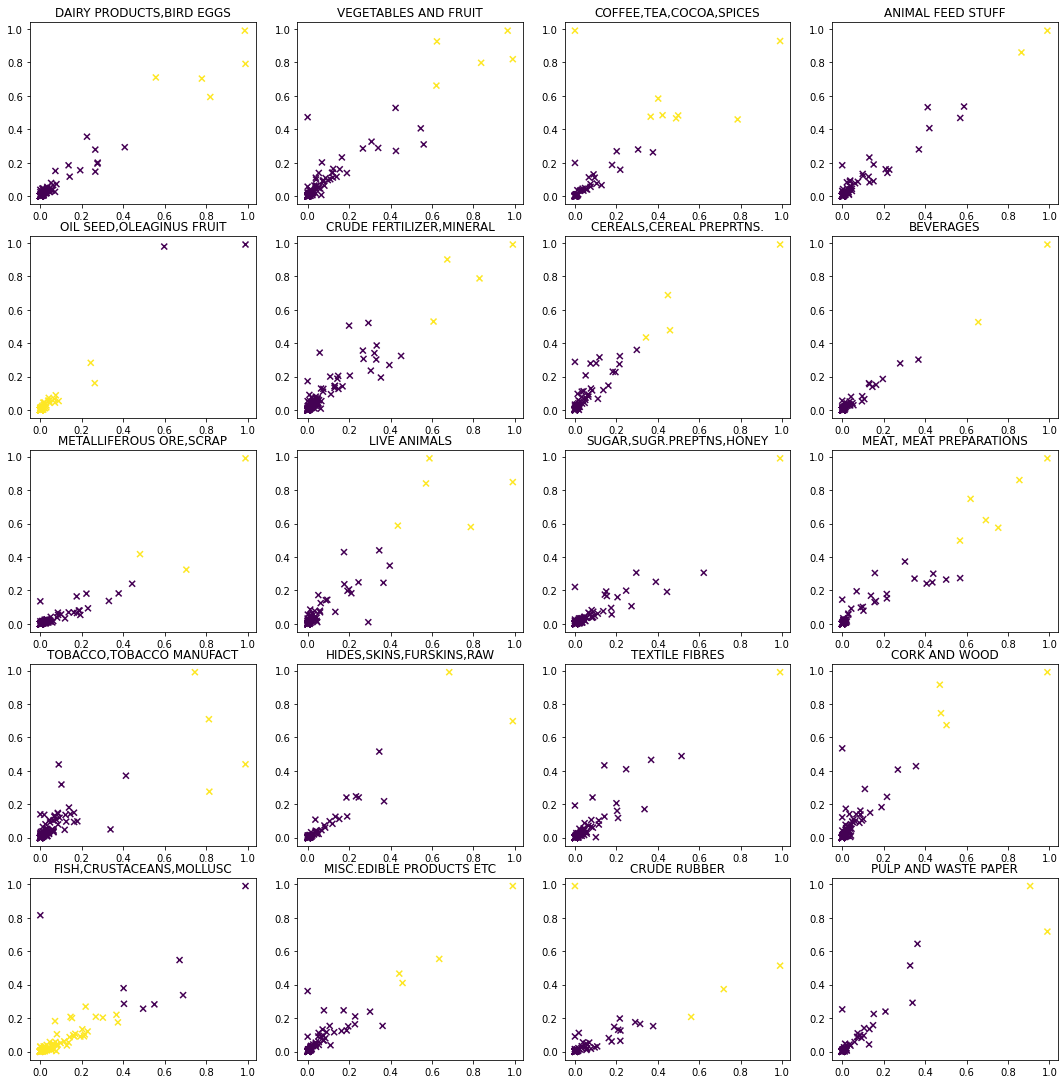

In [21]:
combine_plot_cluster(1, scale_percent(dfs_c))

## Test

In [17]:
commodity_key_map = {i: k for i, k in enumerate(commodities)}
country_key_map = {i: name for i, name in enumerate(country_names)}

print(commodity_key_map, country_key_map, sep="\n")

{0: 2, 1: 5, 2: 7, 3: 8, 4: 22, 5: 27, 6: 4, 7: 11, 8: 28, 9: 0, 10: 6, 11: 1, 12: 12, 13: 21, 14: 26, 15: 24, 16: 3, 17: 9, 18: 23, 19: 25}
{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Andorra', 4: 'Angola', 5: 'Anguilla', 6: 'Antigua & Barduba', 7: 'Argentina', 8: 'Armenia', 9: 'Aruba', 10: 'Australia', 11: 'Azerbaijan', 12: 'Bahamas', 13: 'Bahrain', 14: 'Bangladesh', 15: 'Barbados', 16: 'Belarus', 17: 'Belgium', 18: 'Belize', 19: 'Benin', 20: 'Bermuda', 21: 'Bhutan', 22: 'Bolivia', 23: 'Bosnia Herzegovina', 24: 'Botswana', 25: 'Brazil', 26: 'Brunei Darussalam', 27: 'Bulgaria', 28: 'Burkina Faso', 29: 'Burundi', 30: 'Cabo Verde', 31: 'Cambodia', 32: 'Cameroon', 33: 'Canada', 34: 'China', 35: 'China, Hong Kong SAR', 36: 'China, Macao SAR', 37: 'Colombia', 38: 'Comoros', 39: 'Congo', 40: 'Cook Isds', 41: 'Costa Rica', 42: 'Cote dlvoire', 43: 'Croatia', 44: 'Cyprus', 45: 'Czechia', 46: 'Denmark', 47: 'Dominican Rep.', 48: 'Ecuador', 49: 'Egypt', 50: 'El Salvador', 51: 'Eritrea', 5

In [46]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10],
    [11, 12],
    [13, 14],
    [15, 16],
    [17, 18],
    [19, 20]
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])

g = GaussianMixture(n_components=3, random_state=0).fit(X)

In [47]:
means = g.means_

a = np.prod(means, axis=1)
ranks = np.empty_like(a)
ranks[np.argsort(a)] = np.arange(len(a))
print(ranks)

y_ = ranks[y]
print(y)
print(y_)

[1. 2. 0.]
[0 0 0 0 1 1 1 2 2 2]
[1. 1. 1. 1. 2. 2. 2. 0. 0. 0.]


In [1]:
# Sample dataframes
data_t = {'2000': [100, 200, 300],
          '2005': [150, 250, 350],
          '2010': [120, 220, 320]}
data_g = {'2000': [10, 1000, 2000, 20, 3000],
          '2005': [10, 1500, 2500, 20, 3500],
          '2010': [10, 1200, 2200, 20, 3200]}


df_t = pd.DataFrame(data_t, index=['A', 'B', 'C'])
df_g = pd.DataFrame(data_g, index=['Z', 'A', 'B', 'D', 'C'])

# Merge the dataframes based on the common index
result_df = pd.merge(df_t['2000'], df_g['2000'], left_index=True, right_index=True, how='left')

print(result_df)


NameError: name 'pd' is not defined